In [1]:
import data_smoothing
import find_peaks
import peak_character

# Load TA data

In [2]:
data_nm, data_time, data_z = data_smoothing.load_data_csv('exp03_20180103 -t0 -chirp.csv', 900, 1400, 1)

# Smooth data

In [3]:
smooth_matx = data_smoothing.earth_smooth_matrix(data_nm, data_z)

/Users/demiliu/miniconda3/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.7-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/demiliu/miniconda3/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.7-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


# Find Peaks

In [4]:
threshold = 0
mindist = 0
idx, height, fwhm = peak_character.peak_matrix(data_nm,smooth_matx, threshold, mindist)

In [5]:
idx.describe()

,0,1,2
count,666.000000,186.000000,7.000000
mean,46.749249,72.010753,123.142857
std,16.018463,33.538198,6.202918
min,6.000000,42.000000,118.000000
25%,53.000000,51.000000,118.500000
50%,56.000000,53.000000,119.000000
75%,56.000000,119.000000,128.000000
max,59.000000,135.000000,132.000000


In [6]:
height.describe()

,0,1,2
count,666.000000,186.000000,7.000000
mean,-0.001437,-0.000950,-0.000214
std,0.000475,0.000559,0.000165
min,-0.003789,-0.001443,-0.000393
25%,-0.001411,-0.001320,-0.000330
50%,-0.001318,-0.001255,-0.000258
75%,-0.001217,-0.000160,-0.000102
max,-0.000230,0.000071,0.000017


# Classify Peaks - KMeans

In [9]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

def data_grouping(index_df, height_df, fwhm_df):
    peak_list = []
    
    for i in range(index_df.shape[0]):
        for j in range(index_df.shape[1]):
            peak_list.append(
            [index_df.loc[i,j], height_df.loc[i,j], fwhm_df.loc[i,j], i])
        
    all_points = pd.DataFrame(peak_list, 
    columns=['Position', 'Height', 'Width', 'Time'])
    fill_na = all_points.fillna(value=0)
    corrected_output = fill_na.drop(fill_na[abs(fill_na.Height) < 0.0002].index)
    corrected_output = corrected_output.reset_index(drop=True)
    
    return corrected_output

def cluster_classifier(index_df, corrected_output):
    found_peak = index_df.shape[1]
    cluster = KMeans(n_clusters=found_peak).fit(corrected_output.iloc[:,:-2])
    print(cluster.labels_)
    print(cluster.cluster_centers_)
    cluster_dict = {}
    
    for i in range(found_peak):
            cluster_dict['peak_%s' % i] = []
            
    for j in range(corrected_output.shape[0]):
        peak = cluster.predict([corrected_output.values[j,:-2]])
        for k in range(found_peak):
            if (peak == k):
                cluster_dict['peak_%s' % k].append(corrected_output.values[j])
                #print('found a match')

    peak_dict = { k:v for k, v in cluster_dict.items() if len(v) >= 5}
    return peak_dict

In [10]:
corrected_output = data_grouping(idx, height, fwhm)
corrected_output.describe()

,Position,Height,Width,Time
count,807.00000,807.000000,807.000000,807.00000
mean,48.10285,-0.001404,174.902382,291.45601
std,15.97301,0.000446,39.606767,199.12853
min,6.00000,-0.003789,83.450000,0.00000
25%,51.00000,-0.001396,161.760000,109.00000
50%,55.00000,-0.001311,165.260000,267.00000
75%,56.00000,-0.001220,182.363000,466.50000
max,125.00000,-0.000210,350.989000,665.00000


In [11]:
corrected_output

,Position,Height,Width,Time
0,17.0,-0.003516,89.092,0
1,17.0,-0.003728,85.662,1
2,17.0,-0.003561,85.662,2
3,17.0,-0.003659,85.662,3
4,16.0,-0.003789,85.662,4
5,17.0,-0.003537,85.662,5
6,17.0,-0.003514,89.092,6
7,17.0,-0.003445,89.092,7
8,17.0,-0.003270,89.092,8
9,17.0,-0.003209,89.092,9


In [12]:
peak_dict = cluster_classifier(idx, corrected_output)

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 2 0 1 2 0 1
 0 2 0 0 0 0 1 0 1 0 1 2 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 2 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 2
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

# convert dictionary to a data frame

In [15]:
def dict_to_pd(dict_item, nm):
    nm_pd = pd.DataFrame(data_nm)
    #convert index to nm
    nm_list = []
    df = pd.DataFrame(dict_item, 
    columns=['Position', 'Height', 'Width', 'Time'])         
    df = df.drop_duplicates(subset= 'Time')
    df = df.reset_index(drop=True)
    for j in df['Position']:
        nm_list.append(nm_pd.loc[j].values[0])
        
    df['Position'] = nm_list
    
    return df

# Use peak 0

In [17]:
df_1 = dict_to_pd(peak_dict['peak_0'], data_nm)

# Fit functions

In [14]:
import numpy as np
from scipy.optimize import differential_evolution
from scipy.special import gamma

def abs_data(data):
    abs_array = np.abs(data)
    
    return abs_array

def singleexpfunc(t, params):
    exp_array = params[0] *np.exp((-1.0/params[1]) * t)

    return exp_array

def fit_single_exp_diffev(t, data):
    a1_bounds = (0, 1)
    tau1_bounds = (0, 1000)
    bounds = [a1_bounds, tau1_bounds]
    time_array = t
    data_array = abs_data(data)
    def fit(params):
        decaymodel = singleexpfunc(time_array, params[:])
        cost = np.sum(((data_array - decaymodel) ** 2.0))
        return cost
    bestfit = differential_evolution(fit, bounds = bounds, polish = True)
    bestfit_params = bestfit.x
    def bestfit_decay(params):
        decaymodel = singleexpfunc(time_array, params[:])
        return decaymodel    
    bestfit_model = bestfit_decay(bestfit_params)   
    
    ss_res = np.sum((data_array - bestfit_model) ** 2.0)
    ss_tot = np.sum((data_array - np.mean(data_array)) ** 2.0)
    rsquare = 1 - (ss_res / ss_tot)
    
    return bestfit_params, bestfit_model, data_array, time_array

In [58]:
def fitting_vis(df, data_nm):
    """fit peak intensity array to monoexponential,
    then visualize peak intensity overlaid with best-fit, 
    height and fwhm dynamics
    
    Args:
        peak_dict: dictionary of peak index, height and fwhm
        data_nm: wavelength array
    
    """
    
    nm = pd.DataFrame(data_nm)

    fit_exp = fit_single_exp_diffev(df['Time'], df['Height'])
    bf = fit_exp[1]
    bf_params = fit_exp[0]
    
    #add best-fit to dataframe
    #multiply by -1 because previous data 
    #was taken absolute value
    df['Fit'] = -1*bestfit
    
    #plot peak position, intensity and width over time
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8))
        
    ax1.plot(df['Time'], df['Height'], '.', label = 'Height')
    ax1.plot(df['Time'], df['Fit'], label = 'Mono-exponential fit')
    x_pos = int(np.array(df['Time'])[-1]*3/5)
    y_pos = np.max(df['Fit'])
    plt.annotate('Tau' + ' = ' + '%.1f' %(bf_params[1]) + ' ps', (x_pos, y_pos))
    ax1.set_title('Peak Dynamics', fontsize=18, fontweight='bold')
    ax1.set_ylabel('Intensity', fontsize=18, fontweight='bold')
    ax1.grid()
        
    ax2.plot(df['Time'], df['Position'], '.')
    ax2.set_ylabel('Position', fontsize=18, fontweight='bold')
    ax2.grid()
        
    ax3.plot(df['Time'], df['Width'], '.')
    ax3.set_ylabel('Width', fontsize=18, fontweight='bold')
    ax3.set_xlabel('Time', fontsize=18, fontweight='bold')
    ax3.grid()
        
    plt.show()
        
    return

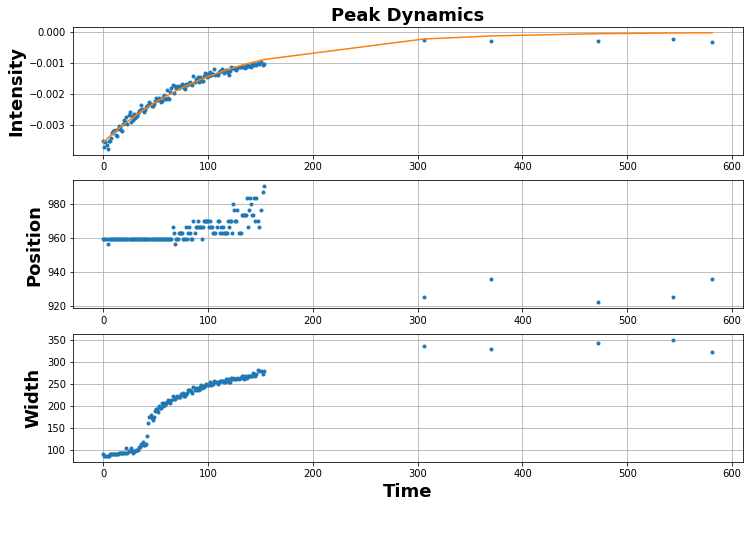

In [59]:
df_1 = dict_to_pd(peak_dict['peak_0'], data_nm)
fitting_vis(df_1, data_nm)

In [51]:
def save_df(df,filename):
    df.to_csv(filename, sep = ',', columns=['Position', 'Height', 'Width', 'Time', 'Fit']) 
    return